<a href="https://colab.research.google.com/github/muhammad-usama-aleem/ML-Day-5-SVR/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[170370.0204065]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


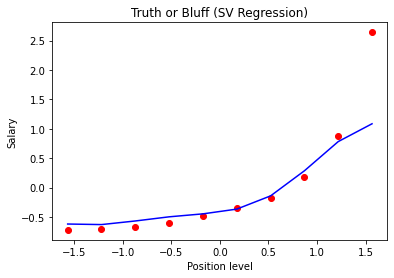

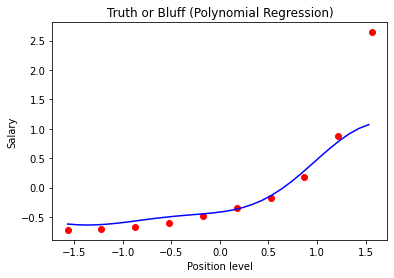

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
y=np.reshape(y,(10,1))

# if the dataset is small then do not split the dataset into training and test set.
"""# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)"""

# feature scaling
from sklearn.preprocessing import StandardScaler

# we scale our data so higher square root difference does not dominate the lower one.
sc_x = StandardScaler()  # scaling x if necessary
sc_y = StandardScaler()  # scaling y if necessary
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)


# fitting the regression model into dataset
# create regressor here (mean import library of whatever regression type you want to use)
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

# Predicting a new result with SV Regression
y_predict = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
print(y_predict)


# Visualising the Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Truth or Bluff (SV Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


# Visualising the Regression results (for higher resolution and smoother curve)
x_grid = np.arange(min(x), max(x), 0.1)   # dividing x into small divisions to get smooth results
x_grid = x_grid.reshape((len(x_grid), 1)) # // // // // // // // //// // // .. .. // // // // //
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
